<a href="https://colab.research.google.com/github/cagutierrezgu/My_Portfolio/blob/main/Car%20prices%20analysis/EDA/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data understanding and exploration

En primer lugar, es necesario importar las librerías a usar para el debido análisis de datos, desde el uso de arreglos y dataframes hasta la estadística y la visualización de los datos:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
import statsmodels.api as sm

A continuación leemos el dataframe a usar, el cual puede descargarse desde la página de [Kaggle](https://www.kaggle.com/CooperUnion/cardataset):

In [ ]:
df = pd.read_csv('cars.csv')
display(df)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


Es importante empezar el análisis de datos conociendo qué tipos de datos contiene el dataframe en cada una de sus columnas, luego

In [ ]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

De donde se observan columnas de datos numéricos (tipo *int64* y *float64*) y otras que contienen texto (clasicadas como tipo *object*). Puede verse que las variables tipo *object* son variables categóricas, y para verificarlo debe conocerse mejor la información dentro del dataframe, por lo que se mostrará la descripción de los datos que contiene cada columna:

In [ ]:
des = {'Descripción': ['Marca del vehículo', 'Modelo del vehículo', 'Año de lanzamiento del modelo', 
                       'Tipo de combustible del motor', 'Caballos de fuerza del motor', '# de cilindros del motor', 
                       'Tipo de transmisión del vehículo', 'Tipo de tracción del vehículo', '# de puertas del vehículo', 
                       'Categoría del vehículo según el mercado', 'Tamaño del vehículo', 'Estilo del vehículo', 
                       'Millas por galón consumidas en carretera', 'Millas por galón consumidas en la ciudad', 
                       'Popularidad del vehículo', 'Precio sugerido por el fabricante en dolares']}

description = pd.DataFrame(data = des, index = df.columns)
description

,Descripción
Make,Marca del vehículo
Model,Modelo del vehículo
Year,Año de lanzamiento del modelo
Engine Fuel Type,Tipo de combustible del motor
Engine HP,Caballos de fuerza del motor
Engine Cylinders,# de cilindros del motor
Transmission Type,Tipo de transmisión del vehículo
Driven_Wheels,Tipo de tracción del vehículo
Number of Doors,# de puertas del vehículo
Market Category,Categoría del vehículo según el mercado


Así mismo, es posible conocer más allá del tipo de datos por columna con el método **.info()**, como saber si existen datos faltantes:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

De lo anterior puede advertirse que hay 5 columnas con datos faltantes, especialmente la columna *Market Category* con casi más de 3000 datos sin registrar. Por otro lado, para conocer un primer análisis estadístico de los datos númericos usamos el método **.describe()** como se ve a continuación:

In [ ]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


Otro de los análisis exploratorios que pueden realizarse consiste en conocer el número de datos únicos de una determinada columna, así como los datos más frecuentes. Seguidamente se muestra un ejemplo para las columnas *Transmission Type* y *MSRP*

In [ ]:
# Vistazo de la columna Transmission type
print(f'''Columna: {df.columns[6]} \nDatos: {list(df[df.columns[6]].value_counts().index)}
# de datos únicos: {df[df.columns[6]].nunique()}\n''')

# Vistazo de la columna MRSP (Precio sugerido por el fabricante)
print(f'''Columna: {df.columns[15]} \nDatos más repetidos: {list(df[df.columns[15]].value_counts().index[:10])}
# de datos únicos: {df[df.columns[15]].nunique()}''')

Columna: Transmission Type 
Datos: ['AUTOMATIC', 'MANUAL', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE', 'UNKNOWN']
# de datos únicos: 5

Columna: MSRP 
Datos más repetidos: [2000, 25995, 29995, 20995, 27995, 23995, 30995, 24995, 21995, 26195]
# de datos únicos: 6049


Como dato interesante cabe resaltar que es desconocida la transmisión de cierto número de vehículos, dejando así 4 tipos de transmisión en los vehículos del dataframe.

El análisis visual puede esclarecer los caminos a seguir a la hora de un posterior análisis y las conclusiones que se afirmen luego de un debido estudio de los datos. Es por lo anterior que se muestra el siguiente histograma con los datos de las columnas *highway MPG* y *city mpg*

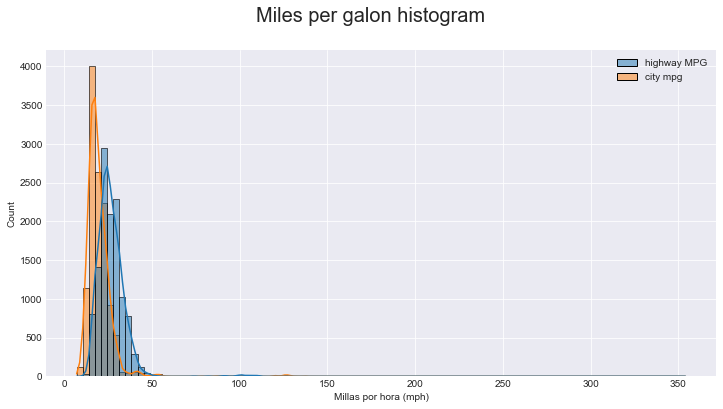

In [ ]:
df_mpg = df[["highway MPG", "city mpg"]]

plt.figure(figsize=(12,6))
plt.style.use('seaborn-darkgrid');
sns.histplot(df_mpg, bins = 100, kde=True);
plt.xlabel('Millas por hora (mph)'); plt.suptitle('Miles per galon histogram', fontsize = 20);

El uso de una escala diferente podría mostrar de mejor manera la distribución que siguen los datos, por ejemplo la logarítmica:

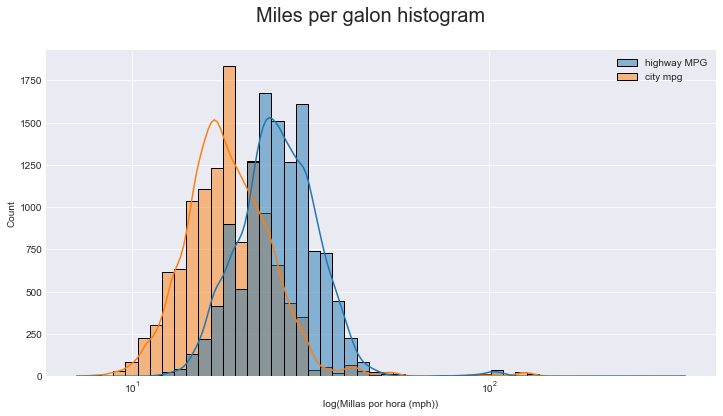

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df_mpg, bins = 50, kde=True, log_scale=True);
plt.xlabel('log(Millas por hora (mph))'); plt.suptitle('Miles per galon histogram', fontsize = 20);

Aún así, algunos pocos datos aparecen alejados del resto de la distribución. Otra opción es poner límites en el eje x, por ejemplo los datos que se encuentran debajo del percentil 99:

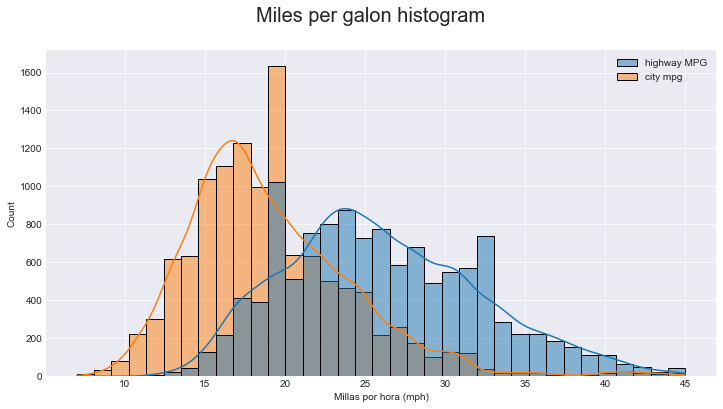

In [ ]:
most_data = np.percentile(list(df_mpg['highway MPG']), 99)

plt.figure(figsize=(12,6))
sns.histplot(df_mpg[df_mpg < most_data], bins = 35, kde=True);
plt.xlabel('Millas por hora (mph)'); plt.suptitle('Miles per galon histogram', fontsize = 20);

Por último, es importante realizar un primer acercamiento a las posibles relaciones entre las variables numéricas, para lo cual usamos un mapa de calor:

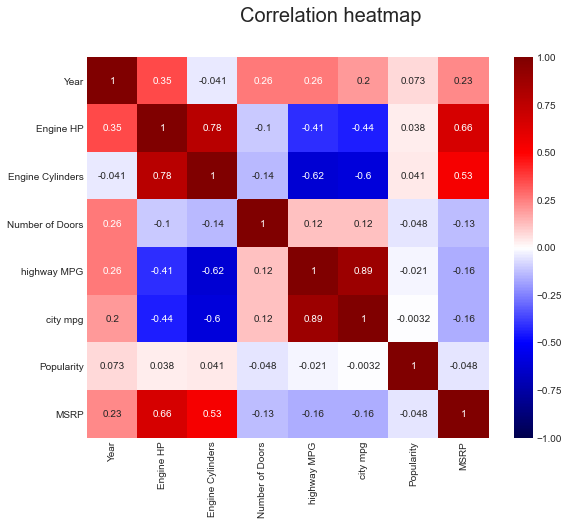

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, 
            cmap = 'seismic', vmin = -1, vmax = 1, annot = True)
plt.suptitle('Correlation heatmap', fontsize = 20);

Del cual se observan relaciones considerables entre *Engine cylinders* y *Engine HP*, así como entre *highway MPG* y *city mpg*.

## Data preparation

### Modificación de mayusculas y espacios

En primer lugar, resulta conveniente trabajar con datos en los que los espacios sean reemplazados por guiones bajos, así como evitar el uso de mayúsculas en el caso de que se quisiera hacer uso de librerías de preprocesamiento de lenguaje natural, como lo son *nltk* o *spacy*, sin embargo no es del interés de este proyecto. Por lo tanto modificando los nombres de las columnas:

In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head(10)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


Este procedimiento se repite para los datos de cada columna tipo *object*, las cuales contienen cadenas tipo string:

In [ ]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")
    
df.head(10)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


### Procedimiento con los datos faltantes

Así mismo, es importante conocer el número de datos faltantes por columna para tomar desiciones como la eliminación de filas o columnas, o la imputación de datos a dichos valores faltantes, luego:

In [ ]:
print(df.isnull().sum())

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64


Las columnas *engine_fuel_type*, *engine_hp*, *engine_cylinders* y *number_of_doors* tienen pocos valores faltantes en comparación con el total de datos del dataframe, así que a los valores faltantes se le pueden imputar la media, mediana o la moda de todos los datos según corresponda. Por otro lado, la columna *market_category* tiene casi 1 de cada 4 valores faltantes, luego resulta más apropiado eliminar dicha columna:

In [ ]:
# Copia del dataframe original
df_clean = df.copy()

# engine_fuel_type: La moda es la mejor opción 
# al ser datos tipo string
mode_fuel = df_clean['engine_fuel_type'].mode()[0]

# engine_hp: Obtener la media y redondear es
# apropiado ya que los datos son del orden de
# centenas y el redondeo afecta en máximo 0.5
mean_hp = round(df_clean['engine_hp'].mean())

# engine_cylinders: Los datos son enteros y apenas
# alcanzan una decena, luego es más acertado hallar
# la mediana en vez de redondear la media
median_cylinders = df_clean['engine_cylinders'].median()

# number_of_doors: Por el mismo argumento de la
# variable anterior, es más acertada la mediana
median_doors = df_clean['number_of_doors'].median()

# Imputación de los valores ya calculados
df_clean['engine_fuel_type'] = df['engine_fuel_type'].fillna(mode_fuel)
df_clean['engine_hp'] = df['engine_hp'].fillna(mean_hp)
df_clean['engine_cylinders'] = df['engine_cylinders'].fillna(median_cylinders)
df_clean['number_of_doors'] = df['number_of_doors'].fillna(median_doors)

# Eliminación de la columna market_category
df_clean.drop(columns = 'market_category', axis = 1, inplace = True)

print(df_clean.isnull().sum())
df_clean

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,midsize,4dr_hatchback,23,16,204,50920


### Revisión de datos anómalos

Por otro lado, será necesario realizar un estudio de datos anómalos u outliers que puedan entorpercer modelos de predicción como regresiones lineales o multilineales que se pretenden hacer más adelante, así que se usará se calculará el *z score* y para valores absolutos mayores que 3 se considerarán valores atípicos:

In [ ]:
def outliers(data, col):
    outl = stats.zscore(data[col])
    index = np.where(abs(outl) >= 3)
    data.drop(index[0], inplace = True)
    data.reset_index(drop=True, inplace=True)
    return data
    
df_outl = df.copy()
outliers(df_outl,'msrp')

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11690,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11691,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11692,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11693,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


Donde se ha usado la función sobre la columna *msrp*, que será de mucho interés en las siguientes secciones, pero así mismo puede ser aplicada sobre cualquier otra columna de interés.